# <center>  Python for biologists

## Lecture 6, Files
07.10.2023


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

***Notion 0***. Feel free to start using shortcuts when working with Jupyter Notebook:
- To run the cell `Ctrl`+`Enter`
- To run the cell and step to the next one `Shift` + `Enter`
- To run the cell and create the new one `Alt` + `Enter`

There are two modes of action: cell-editing (the line on the left is green) and cell-selecting (the line on the left is blue). 

- cell-editing mode &#8594; `Esc` &#8594; cell-selecting mode
- cell-selecting mode &#8594; `Enter` &#8594; cell-editing mode

In cell-selecting mode you can:

- Delete  a cell - `DD`
- Undo deleting - `Z`


### <center> Let's move on!

---

# Standard library modules

- sys \*\*\*
- os \*\*\*
- re \*\*
- os.path \*\*\*, glob, pathlib
- argparse \*
- venv \*
- datetime \*
- itertools, functools \*
- multiprocessing, threading \*
- collections
- copy
- pprint
- typing
- gc

**sys**:
- exit
- getsizeof
- path
- stdin, stdout, stderr \*\*\*

**os**:
- chdir, getcwd
- mkdir
- chmod, chown
- listdir \*\*
- rename
- cpu_count

**os.path**:
- basename
- exist
- isfile, isfile \*
- join \*\*\*
s
- isfile, isfile *
- join ***


### Inspecting OS

In [59]:
import os

Listing files in the directory

In [61]:
print(os.listdir('data')) # in some specific
print(os.listdir()) # in current

['snps.vcf', 'test.fastq']
['.ipynb_checkpoints', 'data', 'Drawio', 'Lecture_5_Modules.ipynb', 'Lecture_6_Files.ipynb', 'my_module.py', 'Notebooks', 'scripts', 'src', '__pycache__']


Check whether the path a file or not (there are the same function for dirs and links)

In [8]:
os.path.isfile('data/snps.vcf') 

True

To construct paths in OS-independent way - use this function

In [9]:
os.path.join('data', 'snps.vcf')

'data/snps.vcf'

In [13]:
out_dir = 'data'
out_file = 'filenameA1_filtered_sorted.txt'

In [14]:
os.path.join(out_dir, out_file)

'data/filenameA1_filtered_sorted.txt'

More advanced scanning of OS (in loops)

In [15]:
os.scandir() # Portable OS Interface

In [17]:
for f in os.scandir():
    print(f)

<DirEntry '.ipynb_checkpoints'>
<DirEntry 'data'>
<DirEntry 'Drawio'>
<DirEntry 'Lecture_5_Modules.ipynb'>
<DirEntry 'Lecture_6_Files.ipynb'>
<DirEntry 'my_module.py'>
<DirEntry 'Notebooks'>
<DirEntry 'scripts'>
<DirEntry 'src'>
<DirEntry '__pycache__'>


## Opening files

In [39]:
file = open('my_module.py')

In [40]:
text = file.read()

In [41]:
type(str)

type

In [42]:
text

"print('Hi, i am your module!')\n\npi = 3.14\n\n\ndef sin(x):\n    return x\n"

Pay attention to '\n' symbols (linebreaks). The `print` function can display it in a nice way

In [43]:
print(text)

print('Hi, i am your module!')

pi = 3.14


def sin(x):
    return x



UNIX-like OS: '\n' 

Windows: '\r\n'

### But,
the most important thing to do with file - to close it

In [128]:
py_file.close()

Due to this fact, in python we work with files using special so-called `context manager`:

In [131]:
with open('my_module.py') as py_file: # контекстный менеджер
    print(py_file.read()) # работаем с файлом внутри блока
                          # вне блока файл закрывается 
print('_')
print(py_file.read()) # тут файл уже закрыт и его чтение дает ошибку

print('Hi, i am your module!')

pi = 3.14


def sin(x):
    return x

_


ValueError: I/O operation on closed file.

- В `open` хорошо бы подавать пути через `os.path.join`.
- Читать весь файл единым киричем за раз - не очень хорошо. И работать сложно, и компьютеру может быть больно. Можно читать отдельные строки. Каждый раз читая строку, вы переходите на следующую

In [132]:
data_dir = 'data'
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')

##fileformat=VCFv4.2
##fileDate=20230207


Чтобы вернуться назад, можно попросить питон найти "нулевой" байт в вашем файле и перейти на него. Но так обычно редко приходится делать.

In [133]:
data_dir = 'data'
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')
    print(vcf_file.readline(), end='')
    vcf_file.seek(0)
    print()
    print(vcf_file.readline(), end='')

##fileformat=VCFv4.2
##fileDate=20230207
##source=PLINKv1.90

##fileformat=VCFv4.2


**Задача 1**

> Напечатать самую первую строчку после комментариев в VCF-файле

In [78]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    line = vcf_file.readline()
    while line.startswith('##'):
        line = vcf_file.readline()
    print(line, end='')
    print(vcf_file.readline(), end='')
        
    

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	FAM001_ID001
Y	2649694	i4000095	T	.	.	.	PR	GT	0/0


Также можно прочитать все строки за раз, но этом может перегрузить память компьютера, будьте аккуратнее

In [79]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    lines = vcf_file.readlines()

In [82]:
lines[:5]

['##fileformat=VCFv4.2\n',
 '##fileDate=20230207\n',
 '##source=PLINKv1.90\n',
 '##contig=<ID=1,length=249218993>\n',
 '##contig=<ID=2,length=243048761>\n']

Но так зато можно работать со строками вполне в привычном для нас режиме

In [83]:
data = []
for line in lines:
    if not line.startswith('#'):
        data.append(line)

In [84]:
data[:10]

['Y\t2649694\ti4000095\tT\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2649696\ti4000093\tN\t.\t.\t.\tPR\tGT\t./.\n',
 'Y\t2655180\trs11575897\tG\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655248\ti5004371\tG\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655265\ti5004367\tT\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655308\ti5004381\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655319\ti5004386\tA\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655324\ti5004379\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655325\ti5004380\tC\t.\t.\t.\tPR\tGT\t0/0\n',
 'Y\t2655328\ti5004382\tT\t.\t.\t.\tPR\tGT\t0/0\n']

На самом деле, **можно итерироваться сразу по файлу!**

In [95]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            print(line)
            break

Y	2649694	i4000095	T	.	.	.	PR	GT	0/0



Давайте посомтрим на нашу строчку. Что нам делать с такой ерундовиной?

In [96]:
line # тут куча всяких технических вещей типо \t (TAB) и \n (перенос строки)

'Y\t2649694\ti4000095\tT\t.\t.\t.\tPR\tGT\t0/0\n'

Откусить символы с конца строки (по дефолту как раз \n): 

In [97]:
line = line.strip()

Разбить строку по символам

In [99]:
line.split('\t')

['Y', '2649694', 'i4000095', 'T', '.', '.', '.', 'PR', 'GT', '0/0']

**Задача 2**

> Из комментариев в VCF-файле достать названия хромосом (ID) и их длины

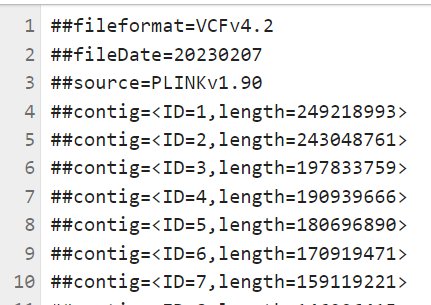

In [135]:
with open(os.path.join(data_dir, 'snps.vcf')) as vcf_file:
    lines = []
    for line in vcf_file:
        if line.startswith('##contig='):
            line = line.strip('>\n')
            line = line.replace('##contig=<ID=', '')
            line = line.split(',length=')
            lines.append(line)


In [137]:
lines

[['1', '249218993'],
 ['2', '243048761'],
 ['3', '197833759'],
 ['4', '190939666'],
 ['5', '180696890'],
 ['6', '170919471'],
 ['7', '159119221'],
 ['8', '146296415'],
 ['9', '141066492'],
 ['10', '135523247'],
 ['11', '134940417'],
 ['12', '133838354'],
 ['13', '115103151'],
 ['14', '107285438'],
 ['15', '102398632'],
 ['16', '90163276'],
 ['17', '81047709'],
 ['18', '78015181'],
 ['19', '59094137'],
 ['20', '62960293'],
 ['21', '48100156'],
 ['22', '51214250'],
 ['Y', '59032810'],
 ['M', '16548']]

### Режимы работы с файлами
- r - чтение (по-умолчанию)
- w - запись
- a - дозапись
- b - бинарные файлы

Можно комбинировать типо `mode='rb'`


Читаем файлы:

In [ ]:
with open(os.path.join(data_dir, 'snps.vcf'), mode='r') as vcf_file:
    pass # 

Записываем что-то в файлы

Есть только метод write, он принимает строчку которую надо записать.
Если хотите записывать несколько строк, надо вручную добавлять `\n`.

In [116]:
with open(os.path.join(data_dir, 'text.txt'), mode='w') as file:
    for text in ('a', 'b', 'c'):
        file.write(text + '\n')

Для работы с сжатыми файлами есть специальные средства, например, `gzip`

In [138]:
import gzip
gzip.compress(b'AAAA') # ASCII

b'\x1f\x8b\x08\x00\xca9!e\x02\xffsttt\x04\x00\xf1\x08\r\x9b\x04\x00\x00\x00'

In [122]:
with gzip.open(os.path.join(data_dir, 'text.txt'), mode='w') as file:
    file.write(gzip.compress(b'AAAA'))

In [139]:
with gzip.open(os.path.join(data_dir, 'text.txt')) as file:
    print(gzip.decompress(file.read()))

b'AAAA'
